# Kazarlis 10 Generator Problem

This notebook runs the GA on the 10 generator problem and demand profile given in the original paper by Kazarlis et al. 1996. 

The original Kazarlis problem showed training for 500 generations, achieving a minimum operating cost of $\$$565825. The maximum cost over 20 runs reported was $\$$570032 dollars. Each generation has a population of 50 genotypes.

## Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from genetic_algorithm import run_genetic_algorithm
from economic_dispatch import economic_dispatch
from helpers import convert_to_integer
from fitness import calculate_constraint_costs

## Read demand and generator info

In [44]:
# Change demand profile here
demand = np.genfromtxt('data/kazarlis_demand.txt')

# Change gen_info here
gen_info = pd.read_csv('data/kazarlis_units.csv')

## Input GA parameters

In [51]:
# Supply the kwargs
all_kwargs = {'demand': demand,
              'gen_info': gen_info,
              'init_status': gen_info['status'],
              'voll': 1e3,
              'constraint_penalty': 1e4,
              'reserve_margin': 0.1,
              'mutation_probability': 0.01,
              'crossover_probability': 0.5,
              'swap_window_probability': 0.3,
              'window_mutation_probability': 0.3,
              'swap_window_hc_probability': 0.3,
              'pop_size': 50,
              'max_penalty': 1e4,
              'n_hrs': 1} # 1 as hourly resolution for settlement periods

# Set the number of generations
number_of_generations = 100

## Create a random schedule to initialise the GA

In [52]:
# Number of generators and periods
num_gen = gen_info.shape[0]
T = demand.size

# Get a random schedule to begin with
seed_schedules = np.random.choice(2, size = (all_kwargs.get('pop_size'), T, num_gen))

## Run the GA

In [53]:
# Run GA
best_genotype, results, population = run_genetic_algorithm(number_of_generations, seed_schedule, **all_kwargs)

Best fitness at iteration 0: 4817258.469455068
Best fitness at iteration 1: 3378312.18929024
Best fitness at iteration 2: 2069049.053938826
Best fitness at iteration 3: 1142001.4089119188
Best fitness at iteration 4: 1111102.4649244044
Best fitness at iteration 5: 891579.6422443674
Best fitness at iteration 6: 754131.6349377758
Best fitness at iteration 7: 658274.0854265889
Best fitness at iteration 8: 646448.3390002272
Best fitness at iteration 9: 621967.8480823606
Best fitness at iteration 10: 619483.8281107217
Best fitness at iteration 11: 620147.7688090175
Best fitness at iteration 12: 619801.8666328099
Best fitness at iteration 13: 617710.7253561463
Best fitness at iteration 14: 616670.202895717
Best fitness at iteration 15: 610431.4092884492
Best fitness at iteration 16: 611831.4092884492
Best fitness at iteration 17: 606773.1451795525
Best fitness at iteration 18: 602526.166655913
Best fitness at iteration 19: 598575.6677309829
Best fitness at iteration 20: 598578.0249403884
Bes

KeyboardInterrupt: 

## Plot the dispatch

We plot the dispatch of the final solution. 

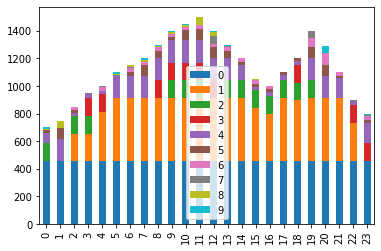

In [50]:
# Calculate ED for the best schedule
ed = economic_dispatch(gen_info, best_genotype.schedule, demand)

# Plot schedule data frame 
df = pd.DataFrame(ed[0])
df.plot(kind='bar', stacked=True)
plt.show()

## Fitness improvement

The improvement in fitness during the GA is plotted below

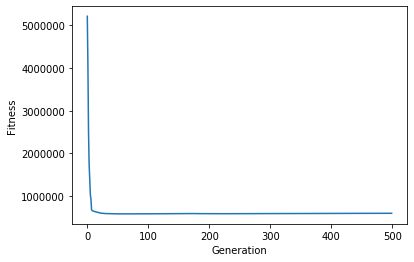

In [22]:
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(number_of_generations), results)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")
plt.show()

## Check constraint violations 

In [26]:
# Are constraints violated?
gen_info = all_kwargs.get('gen_info')
init_status = all_kwargs.get('init_status')
penalty = all_kwargs.get('constraint_penalty')
demand = all_kwargs.get('demand')
reserve_margin = all_kwargs.get('reserve_margin')

constraint_costs = calculate_constraint_costs(best_genotype.schedule, gen_info, init_status, penalty, demand, reserve_margin)
print("Constraint costs: {}".format(np.sum(constraint_costs)))

Constraint costs: 20000.0
